# Is there study bias on proteins with pathogenic mutations?
We are going to explore the relationship between mutations and PTMs.  Specifially, we will test the hypothesis that pathogenic mutations are more likely to have PTMs nearby.  Before we begin, we must first explore what dataset of mutations and proteins we should consider. This code will explore whether there is study bias on proteins with pathogenic mutations, indicating we should control for study bias.

This code is specific for the **SwissProt** mutations dataset.

In [1]:
# Setup the workspace, 
from proteomeScoutAPI import ProteomeScoutAPI
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
from scipy import stats 
import pickle

# set this to 0 if you would like to perform analysis on the entire set, 1 means we will remove extreme 
# outlier proteins in terms of lenght, GO annotations, mutations, or PTMS
FILTER = 1 
%matplotlib inline

# define input file for ProteomeScout data
proteomeScoutFile = '../../data/proteomescout_everything_20151118.tsv'
# read in ProteomeScout data
PTM_API = ProteomeScoutAPI(proteomeScoutFile)

# read in pre-processed IDs to use. These IDs were generated by the align_SwissProtMut_ProteomeScout_IDs.py code
# which reads in the SwissProt mutations data, the ProteomeScoutAPI data, and constructs a single, non-redundant
# set of IDs which refer to the same underlying protein in both the ProtomeoScout dataset and the SwissProt mutations
# dataset. The construction of this list takes ~10-15 minutes to run and generate these IDs, but only needs to be done once (ever) 
humanIds = pickle.load(open('parsed_unique_IDs.p','rb'))

# read in SwissProt mutations data - this is a pre-parsed dictionary generated by the parse_mutations.py code
SwissProtMuts = pickle.load(open('swissprot_mutations.p','rb'))

In [2]:
print "The number of proteins being examined is: %i" % (len(humanIds))

The number of proteins being examined is: 22589


In [3]:
# for every protein get the sequence, GO terms, PTMs and mutations
protDict = {}
for ID in humanIds:
    
    # for each protein ID extract the sequence, GO terms
    # PTMs, and any mutations from the SwissProtsmMuts dataset
    tempProtDict = {}
    tempProtDict['sequence'] = PTM_API.get_sequence(ID)
    tempProtDict['GO_terms'] = PTM_API.get_GO(ID)
    
    
    # if we find mutations set them, else set an empty
    # list
    if ID in SwissProtMuts:
        tempProtDict['mutations'] = SwissProtMuts[ID]
    else:
        tempProtDict['mutations'] = []
    tempProtDict['PTMs'] = PTM_API.get_PTMs(ID)
    
    # having created the record add it into the protDict
    # dictionary
    protDict[ID] = tempProtDict


In [4]:
print "After parsing for mutations and what not we are dealing with %i protein " % len(protDict)

After parsing for mutations and what not we are dealing with 22244 protein 


In [5]:
# create matched vectors of our items of interest
num_GO = []
num_muts = []
num_PTMs = []
seqLength = []
pathoStatus = []
protIds = []

# for each ID in the protein dictionary
for ID in protDict:
    val = 0
    print ID
    # check if any of the mutations in this protein are associated with a disease
    # according to the SwissProt disease mutation annotation
    for m in protDict[ID]['mutations']:
            if m[3] == 'Disease':            
                val = 1
    
    # set the pathogenic states
    pathoStatus.append(val)
    
    ## increment the various lists with the number of 
    # GO terms
    num_GO.append(len(protDict[ID]['GO_terms']))
    
    # Mutations
    num_muts.append(len(protDict[ID]['mutations']))
    
    # PTMs
    num_PTMs.append(len(protDict[ID]['PTMs']))
    
    # Sequence length
    seqLength.append(len(protDict[ID]['sequence']))
    protIds.append(ID)
    
# build a PANDAs dataframe
df = pd.DataFrame({'GO': num_GO,
                   'Mutations': num_muts,
                   'PTMs': num_PTMs,
                   'Sequence': seqLength})

pathoS = pd.Series(pathoStatus)
protId_S = pd.Series(protIds)
df.describe()                        




P30613
Q9NQ79
NP_783322.1
Q8NHX4
Q8NHX9
Q9NXR8
Q9C0H5
A8K702
Q9C0H9
Q9NXR1
Q07960
Q9NXR5
Q96J66
Q96J65
NP_004433.2
P40424
P40426
Q9H2I8
NP_115715.3
P08842
P03891
Q5VUR7
P03897
P02768
P02763
P02765
NP_004385.1
NP_110437.2
NP_001386.1
P39023
NP_663736.2
A4D2Q0
Q69384
Q9P219
Q9P218
NP_001166.3
NP_665912.1
NP_954660.1
Q9P212
Q9H3M9
gi|19923466
Q9H3M7
Q9H3M0
Q5VVP1
NP_054753.1
Q9BZG1
gi|4557026
Q9BZG2
Q9BZG8
P01236
P01233
Q8N865
A6NCC3
Q6NX49
P09001
P53708
P04035
P53701
Q9H963
Q14568
Q9H967
Q14563
Q14562
Q14566
Q9NRH1
Q9NRH2
Q9NRH3
A6NIR3
Q6ZMG9
Q92527
Q92526
Q9Y6Q5-2
Q92523
Q92529
Q02878
A0AVF1-3
Q96HA4
Q96HA7
Q96HA1
Q96HA9
Q96HA8
P19544-2
NP_002129.2
P19075
Q15762
Q15760
Q15761
Q6UW02
Q6UW01
Q15768
NP_079498.2
O95528
Q8WUF8
NP_000201.2
Q96BT3
O95522
O95521
Q02297
Q99519
O15417
Q96RU7
Q96RU3
Q96RU8
Q7Z2W4-3
Q9Y5A7
Q9Y5A6
Q13643
Q13642
Q9Y5A9
Q9NS40
Q02127
A6NH00
NP_085048.1
Q96CN9
Q9NZM1-3
Q6ZRV2
Q96CN7
NP_036605.2
P10645
P10644
P48556
P10646
P48551
P10643
P48553
NP_665682.1
Q5T6X5
NP_056

,GO,Mutations,PTMs,Sequence
count,22244.000000,22244.000000,22244.000000,22244.000000
mean,7.903120,3.171282,14.283672,612.651502
std,10.937723,14.429350,23.357662,621.127045
min,0.000000,0.000000,1.000000,10.000000
25%,0.000000,0.000000,3.000000,294.000000
50%,5.000000,1.000000,8.000000,459.000000
75%,11.000000,3.000000,17.000000,735.000000
max,159.000000,1338.000000,1240.000000,34350.000000


## Generate muliple single-panel correlation figure
**NOTE** that this code and the associated figures aren't actually used in the paper, but we've kept this block in place as an example of how to make larger single panel figures

Index([u'GO', u'Mutations', u'PTMs', u'Sequence'], dtype='object')


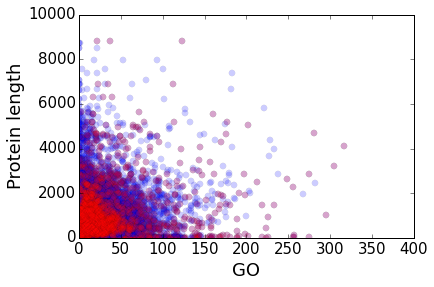

In [7]:
keys = df.columns
print keys
## GLOBAL PLOT PROPERTIES
LEGEND_TEXT=('All proteins', 'With pathogenic mutations')
SCATTER_SIZE=40
ALPHA=0.2
BORDER_WIDTH=0.2
LABEL_SIZE = 18
LIMITS = {'GO':400, 'Mutations':400, 'PTMs':420,'Sequence':10000}

SHOW_LEGEND = False
KEY_PAIRS = [['Mutations','PTMs'],['PTMs','Sequence'],['Mutations','Sequence'],['GO','Mutations'],['GO','PTMs'],['GO','Sequence']]                                                        
# loop generates each induvidual plot
for KEY_PAIR in KEY_PAIRS:

    ## Generate panel 1 - GO vs. mutations
    key1 = KEY_PAIR[0]
    key2 = KEY_PAIR[1]

    #plt.scatter(df[key1], df[key2],alpha=0.5,lw = 0.1,s=1.5,c='k')
    L1 = plt.scatter(df[key1], df[key2], alpha=ALPHA, lw = BORDER_WIDTH,s=SCATTER_SIZE)
    L2 = plt.scatter(df[key1][pathoS==1], df[key2][pathoS==1], c='r',alpha=ALPHA, lw = BORDER_WIDTH, s=SCATTER_SIZE)

    plt.xlim([0,LIMITS[key1]])
    plt.ylim([0,LIMITS[key2]])

    # change name for plots
    if key1 == 'Sequence':
        key1 = 'Protein length'
    if key2 == 'Sequence':
        key2 = 'Protein length'
    
    plt.xlabel(key1,size=LABEL_SIZE)
    plt.ylabel(key2,size=LABEL_SIZE)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    if SHOW_LEGEND:
        legend([L1,L2], LEGEND_TEXT,frameon=False,scatterpoints = 1)
    savefig("figures/%s_vs_%s.pdf"%(key1,key2),bbox_inches='tight')
    

## Generate multi-panel correlation figure

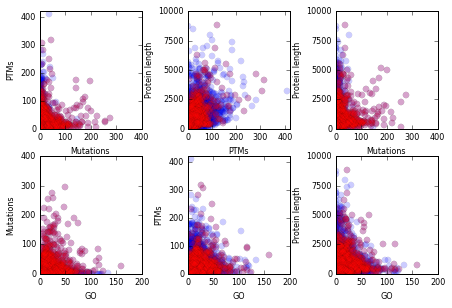

In [8]:
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
SCATTER_SIZE=40
LABEL_SIZE = 8
idxCol = 0
idxRow = 0
ALPHA=0.2
BORDER_WIDTH=0.2
SHOW_LEGEND = False

# explicitly set tick labels to overide matplotlib's default spacing
TICKS = {'Mutations':np.arange(0,450,100), 'GO':np.arange(0,250,50), 'PTMs':np.arange(0,450,100),'Sequence':np.arange(0,12500,2500)}
LIMITS = {'GO':200, 'Mutations':400, 'PTMs':420,'Sequence':10000}
KEY_PAIRS = [['Mutations','PTMs'],['PTMs','Sequence'],['Mutations','Sequence'],['GO','Mutations'],['GO','PTMs'],['GO','Sequence']]                                                        

# loop generates a 6 pannel subplot
for KEY_PAIR in KEY_PAIRS:

    # set keys
    key1 = KEY_PAIR[0]
    key2 = KEY_PAIR[1]

    #plt.scatter(df[key1], df[key2],alpha=0.5,lw = 0.1,s=1.5,c='k')
    axes[idxRow, idxCol].scatter(df[key1], df[key2], alpha=ALPHA, lw = BORDER_WIDTH,s=SCATTER_SIZE)
    axes[idxRow, idxCol].scatter(df[key1][pathoS==1], df[key2][pathoS==1], c='r',alpha=ALPHA, lw = BORDER_WIDTH, s=SCATTER_SIZE)

    # set the plot object to the current axis for direct manipulation of plt variables
    plt.sca(axes[idxRow, idxCol])
    
    plt.xlim([0,LIMITS[key1]])
    plt.ylim([0,LIMITS[key2]])
    
    plt.xticks(TICKS[key1])
    plt.yticks(TICKS[key2])

    # change name for plots
    if key1 == 'Sequence':
        key1 = 'Protein length'
    if key2 == 'Sequence':
        key2 = 'Protein length'
    
    plt.xlabel(key1,size=LABEL_SIZE)
    plt.ylabel(key2,size=LABEL_SIZE)
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    if SHOW_LEGEND:
        legend([L1,L2], LEGEND_TEXT,frameon=False,scatterpoints = 1)

    # update the row and column counter, resetting
    idxCol = idxCol + 1
    if idxCol % (ncols) == 0:
        idxCol = 0
        idxRow += 1

savefig("figures/6_pannel_figure2.pdf",bbox_inches='tight')

## Filter for extreme outliers
Some proteins (here's looking at you, `p53`) have been extremely well studied and as such could skew statistics by having an order of magnitude more annotations than other proteins. We use the Z-score to remove outliers from the dataset. 

In [9]:
if FILTER:
    dfFilt = df[(np.abs(stats.zscore(df)) < 20).all(axis=1)]
    indexes = df[(np.abs(stats.zscore(df)) < 20).all(axis=1)].index.tolist()
    pathoSFilt = pathoS[indexes]
    protIdsFilt = protId_S[indexes]
    df_path = dfFilt[:][pathoSFilt==1]
    df = dfFilt
    pathoS = pathoSFilt
    protId_S = protIdsFilt
    protId_pathoS = protId_S[pathoSFilt==1]
else:
    df_path = df[:][pathoS==1]  
    protId_pathoS = protId_S[pathoS==1]

df_path.describe()

,GO,Mutations,PTMs,Sequence
count,2302.000000,2302.000000,2302.000000,2302.000000
mean,16.474805,15.945265,20.211121,753.383579
std,15.275281,27.289275,25.699069,725.794564
min,0.000000,1.000000,1.000000,51.000000
25%,7.000000,3.000000,6.000000,364.000000
50%,12.000000,7.000000,12.000000,529.500000
75%,21.000000,16.000000,25.000000,858.000000
max,159.000000,275.000000,316.000000,8797.000000


# Correlation across all data
#### NOTE:
With dbSNP mutations data, all the p-values for correlation were very low (p < $10^{-10}$) but with the SwissProt set of mutations now a number of the p-values are larger (notable PTMs vs. sequence and PTMs vs. GO).

In [10]:
rArr = []
pArr = []
keys = df.columns
s = ''
for i in range(0, len(keys)):
    key1 = keys[i]
    for j in range(i+1, len(keys)):
        key2 = keys[j]
        [r, p] = stats.pearsonr(df[key1], df[key2])
        rArr.append(r)
        pArr.append(p)
        s = "%s%s and %s have correlation \t%0.2f with pvalue of %0.E\n"%(s, key1, key2, r, p)
print s
        

GO and Mutations have correlation 	0.23 with pvalue of 3E-269
GO and PTMs have correlation 	0.28 with pvalue of 0E+00
GO and Sequence have correlation 	0.04 with pvalue of 4E-10
Mutations and PTMs have correlation 	0.16 with pvalue of 7E-131
Mutations and Sequence have correlation 	0.19 with pvalue of 6E-181
PTMs and Sequence have correlation 	0.50 with pvalue of 0E+00



In [11]:
df.corr()

,GO,Mutations,PTMs,Sequence
GO,1.000000,0.231931,0.284614,0.041911
Mutations,0.231931,1.000000,0.162170,0.190599
PTMs,0.284614,0.162170,1.000000,0.495323
Sequence,0.041911,0.190599,0.495323,1.000000


# Correlation among pathogenic proteins

In [12]:
rArr = []
pArr = []
keys = df_path.columns
s = ''
for i in range(0, len(keys)):
    key1 = keys[i]
    for j in range(i+1, len(keys)):
        key2 = keys[j]
        [r, p] = stats.pearsonr(df_path[key1], df_path[key2])
        rArr.append(r)
        pArr.append(p)
        s = "%s%s and %s have correlation \t%0.2f with pvalue of %0.E\n"%(s, key1, key2, r, p)
print "Pathogenic correlations and pValues"        
print s

Pathogenic correlations and pValues
GO and Mutations have correlation 	0.20 with pvalue of 3E-22
GO and PTMs have correlation 	0.24 with pvalue of 2E-31
GO and Sequence have correlation 	0.07 with pvalue of 3E-04
Mutations and PTMs have correlation 	0.17 with pvalue of 1E-16
Mutations and Sequence have correlation 	0.24 with pvalue of 4E-31
PTMs and Sequence have correlation 	0.56 with pvalue of 9E-190



In [13]:
df_path.corr()


,GO,Mutations,PTMs,Sequence
GO,1.000000,0.200406,0.239408,0.074770
Mutations,0.200406,1.000000,0.171406,0.238384
PTMs,0.239408,0.171406,1.000000,0.559499
Sequence,0.074770,0.238384,0.559499,1.000000


## Enrichment in annotations
We're going to user Fisher's exact test to ask if there is enrichment in the set of proteins with pathogenic mutations for increased likelihood of having other annotation 

In [14]:
# Check to see if there is enrichment in set of proteins with pathogenic mutations for 
# increased likelihood of having other annotations

N = len(df['Sequence'])
n = len(df_path['Sequence'])
keys = df.columns
numThreshold = range(0, 30, 5)
for j in numThreshold:
    print "\nThreshold for terms > %d"%(j)
    for i in range(0, len(keys)-1):
   
        K_list = df[df[keys[i]]>j]
        k_list = df_path[df_path[keys[i]]>j]
        K = len(K_list[keys[i]])
        k = len(k_list[keys[i]])
        oddsratio, pvalue = stats.fisher_exact([[k, n-k], [K, N-K]], alternative='greater')
     
        print "%s:\t\t %0.E \t(N=%d, n=%d, K=%d, k=%d)"%(keys[i][0:5], pvalue, N, n, K, k)

    


Threshold for terms > 0
GO:		 6E-247 	(N=22236, n=2302, K=15684, k=2251)
Mutat:		 0E+00 	(N=22236, n=2302, K=12056, k=2302)
PTMs:		 1E+00 	(N=22236, n=2302, K=22236, k=2302)

Threshold for terms > 5
GO:		 5E-273 	(N=22236, n=2302, K=10111, k=1905)
Mutat:		 0E+00 	(N=22236, n=2302, K=2637, k=1333)
PTMs:		 4E-53 	(N=22236, n=2302, K=13343, k=1746)

Threshold for terms > 10
GO:		 5E-186 	(N=22236, n=2302, K=5996, k=1324)
Mutat:		 0E+00 	(N=22236, n=2302, K=1191, k=842)
PTMs:		 8E-47 	(N=22236, n=2302, K=8857, k=1276)

Threshold for terms > 15
GO:		 9E-125 	(N=22236, n=2302, K=3486, k=861)
Mutat:		 2E-267 	(N=22236, n=2302, K=737, k=587)
PTMs:		 7E-40 	(N=22236, n=2302, K=6165, k=949)

Threshold for terms > 20
GO:		 2E-92 	(N=22236, n=2302, K=2127, k=582)
Mutat:		 6E-196 	(N=22236, n=2302, K=508, k=427)
PTMs:		 9E-32 	(N=22236, n=2302, K=4464, k=713)

Threshold for terms > 25
GO:		 8E-70 	(N=22236, n=2302, K=1379, k=407)
Mutat:		 1E-167 	(N=22236, n=2302, K=405, k=358)
PTMs:		 2E-27 	(N=2

## Save relevant data for enrichment analysis
Finally, we save the pathogenic protein data and the pathogenic protein IDs to use in the enrichment analysis 

In [15]:
pickle.dump([df_path, protId_pathoS], open("pathoProteins.p", "w"))

In [16]:
print len(df_path)

2302
